<h2><b>Optimización de Portafolios de Markowitz</b></h2>
<h4>Juan David Rincón</h4>

In [1]:
# Librerias
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import scipy

In [2]:
# Parámetros iniciales.
stocks = ['AAPL', 'V', 'UNH', 'CVX', 'SBUX']
start_date = "2022-01-01"
end_date = "2023-12-31"
risk_free_ticker = "^IRX" # 13 weeks (3 months) Treasury Bills.
num_assets = len(stocks)
numberSim = 25000

In [3]:
# Extraer datos activos.
prices_df = yf.download(stocks, start=start_date, end=end_date)['Adj Close']
print(prices_df)

[*********************100%***********************]  5 of 5 completed
                  AAPL         CVX        SBUX         UNH           V
Date                                                                  
2022-01-03  179.953888  110.761490  111.629265  488.573181  218.036118
2022-01-04  177.669983  112.776855  109.294884  477.503754  219.050354
2022-01-05  172.943985  113.510536  105.659370  476.326752  216.628036
2022-01-06  170.056961  114.476440  106.329071  456.833649  216.381866
2022-01-07  170.225052  116.120316  102.913605  446.085144  213.634659
...                ...         ...         ...         ...         ...
2023-12-22  193.600006  151.050003   95.279999  520.309998  258.429993
2023-12-26  193.050003  152.410004   95.669998  520.030029  259.160004
2023-12-27  193.149994  151.910004   95.290001  522.789978  258.929993
2023-12-28  193.580002  149.770004   95.930000  524.900024  260.399994
2023-12-29  192.529999  149.160004   96.010002  526.469971  260.350006

[501 ro

In [4]:
# Extraer tasa libre de riesgo.
risk_free = yf.Ticker(risk_free_ticker).history(start=start_date, end=end_date)
risk_free = risk_free['Close'].iloc[-1]
risk_free /= 100
print(risk_free)

0.05179999828338623


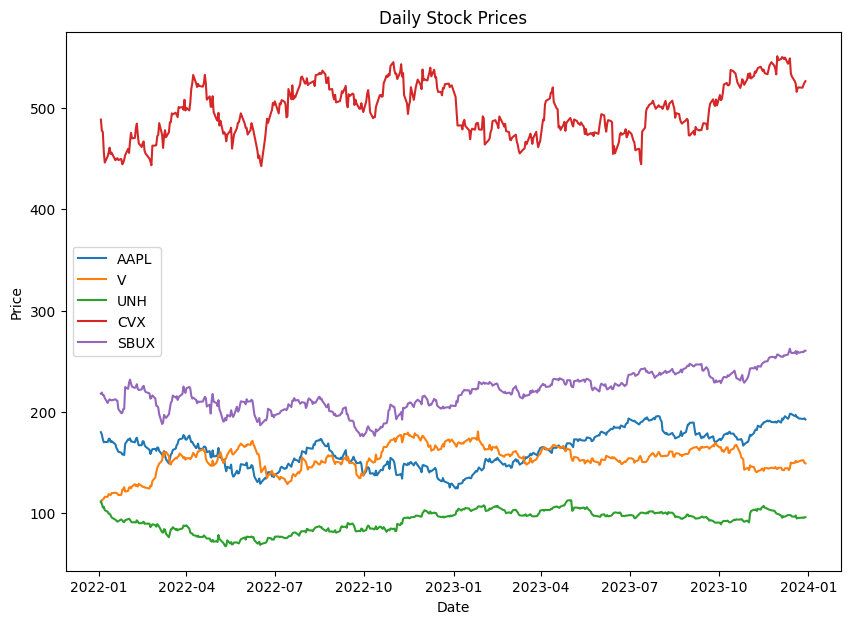

In [5]:
# Gráfica precios.
plt.figure(figsize=(10,7))

for i in range(num_assets):
  plt.plot(prices_df.iloc[:,i], label = f"{stocks[i]}")

plt.title('Daily Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')

plt.legend()
plt.show()

In [25]:
# Retornos Diarios.
returns_df = prices_df.pct_change().dropna()
print(returns_df.head())

# Retornos promedio.
mean_returns = np.array(returns_df.mean())
print(mean_returns)

# Nuevo array de stocks.
stocks = returns_df.columns

                AAPL       CVX      SBUX       UNH         V
Date                                                        
2022-01-04 -0.012692  0.018196 -0.020912 -0.022657  0.004652
2022-01-05 -0.026600  0.006506 -0.033263 -0.002465 -0.011058
2022-01-06 -0.016693  0.008509  0.006338 -0.040924 -0.001136
2022-01-07  0.000988  0.014360 -0.032122 -0.023528 -0.012696
2022-01-10  0.000116  0.000640 -0.014316  0.013956 -0.023000
[ 0.00030223  0.00075668 -0.00012396  0.00025259  0.00047264]


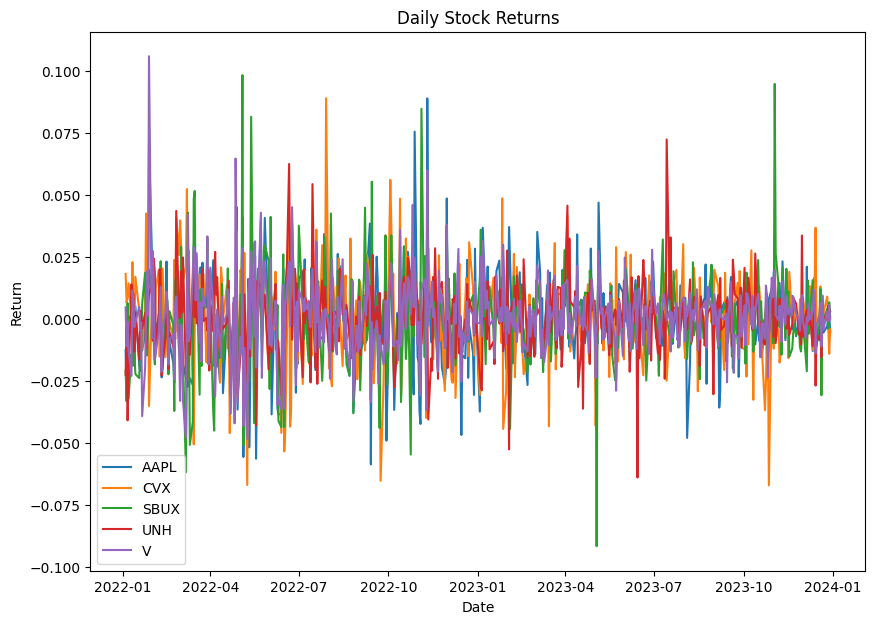

In [27]:
# Gráfica retornos.
plt.figure(figsize=(10,7))

for i in range(num_assets):
  plt.plot(returns_df.iloc[:,i], label = f"{stocks[i]}")

plt.title('Daily Stock Returns')
plt.xlabel('Date')
plt.ylabel('Return')

plt.legend(loc="lower left")
plt.show()

In [28]:
# Inversión individual en los activos.
stocks_return = (1+mean_returns)**(252)-1
stocks_risk = np.std(returns_df)*np.sqrt(252)

indv_all = pd.DataFrame({"Annualized Return" : np.round(stocks_return*100, 2),
                         "Annualized Risk" : np.round(stocks_risk*100, 2)})

print("-"*80)
print("Individual Allocation")
print("\n")
print(indv_all.T)
print("-"*80)

--------------------------------------------------------------------------------
Individual Allocation


                    AAPL    CVX   SBUX    UNH      V
Annualized Return   7.91  21.00  -3.08   6.57  12.65
Annualized Risk    29.05  28.49  29.98  22.81  24.45
--------------------------------------------------------------------------------


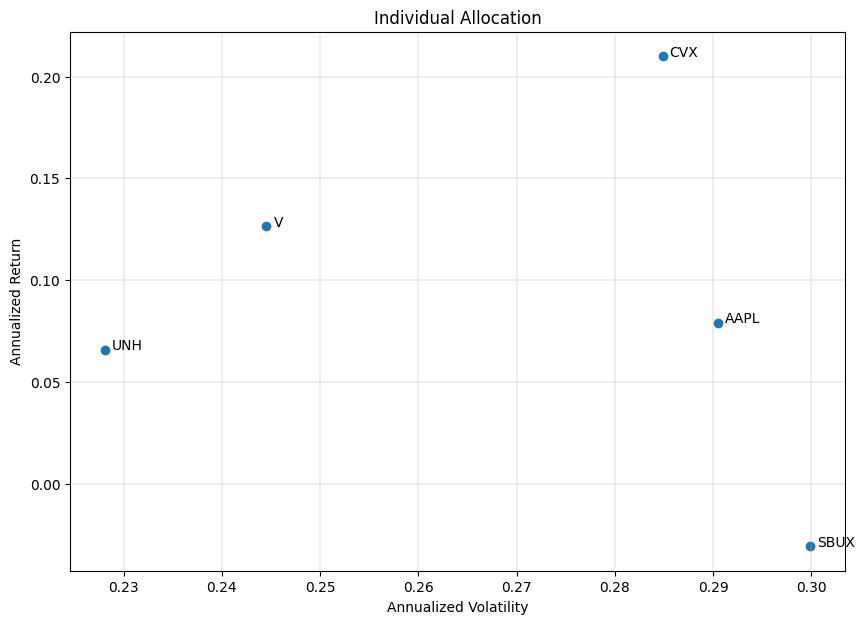

In [29]:
# Gráfica activos individuales.
plt.figure(figsize=(10,7))
plt.scatter(stocks_risk, stocks_return)

for i, name in enumerate(stocks):
    plt.annotate(name, (stocks_risk[i], stocks_return[i]), xytext=(5,0), textcoords='offset points')

plt.title('Individual Allocation')
plt.xlabel('Annualized Volatility')
plt.ylabel('Annualized Return')

plt.grid(True, linewidth=0.3)
plt.show()

In [30]:
# Simular portafolios.
weights = pd.DataFrame(np.nan, index=range(numberSim), columns=stocks)

for i in range(numberSim):
  random_numbers = np.array([random.random() for _ in range(returns_df.shape[1])])
  sum_rand_numbers = sum(random_numbers)

  weights.iloc[i,:] = random_numbers/sum_rand_numbers

print(weights)

           AAPL       CVX      SBUX       UNH         V
0      0.202631  0.181901  0.204914  0.274909  0.135644
1      0.193805  0.113920  0.222527  0.356361  0.113387
2      0.270665  0.226154  0.463211  0.026431  0.013540
3      0.180122  0.023934  0.250835  0.357601  0.187508
4      0.028032  0.395169  0.272069  0.029398  0.275333
...         ...       ...       ...       ...       ...
24995  0.250704  0.350972  0.302920  0.079457  0.015947
24996  0.137325  0.262770  0.331641  0.008168  0.260096
24997  0.296509  0.031311  0.133722  0.223190  0.315268
24998  0.349202  0.002335  0.289999  0.152580  0.205884
24999  0.206466  0.085033  0.113553  0.300643  0.294305

[25000 rows x 5 columns]


In [31]:
# Matriz de Varianza Covarianza.
cov_matrix = np.cov(returns_df, rowvar=False)

# Desviaciones estándar por activo.
stdev_assets = np.sqrt(np.diagonal(cov_matrix))

In [32]:
# Función para calcular rentabilidad de los portafolios (Anual).
def rent_Portfolios_f(weights, mean_returns):
  rtrn1 = np.dot(mean_returns, weights)
  rtrn1 = (1 + rtrn1)**(252)-1
  return rtrn1

# Función para calcular riesgo de los portafolios (Anual).
def risk_Portfolios_f(weights, varcov):
  risk1 = np.dot(weights.T, np.dot(varcov, weights))
  risk1 = np.sqrt(risk1*252)
  return risk1

# Función para calcular Sharpe Ratio.
def sharpe_ratio_f(rent, risk_free, risk):
  sr1 = (rent - risk_free)/risk
  return sr1

In [33]:
# Retornos y riesgo portafolios (Anual).
results_portfolios = pd.DataFrame(np.nan, index=range(numberSim), columns=["Rtrn", "Std Dev", "Sharpe Ratio"])

for i in range(numberSim):
  results_portfolios.iloc[i,0] = rent_Portfolios_f(weights=weights.iloc[i,:], mean_returns=mean_returns)
  results_portfolios.iloc[i,1] = risk_Portfolios_f(weights=weights.iloc[i,:], varcov=cov_matrix)
  results_portfolios.iloc[i,2] = sharpe_ratio_f(rent=results_portfolios.iloc[i,0], risk_free=risk_free, risk=results_portfolios.iloc[i,1])

print(results_portfolios)

           Rtrn   Std Dev  Sharpe Ratio
0      0.080431  0.185181      0.154612
1      0.067919  0.186546      0.086407
2      0.053964  0.221601      0.009767
3      0.057107  0.193839      0.027379
4      0.109192  0.198383      0.289300
...         ...       ...           ...
24995  0.087085  0.203797      0.173139
24996  0.085120  0.204930      0.162593
24997  0.079093  0.202419      0.134837
24998  0.053598  0.218110      0.008244
24999  0.086073  0.188216      0.182094

[25000 rows x 3 columns]


In [34]:
# Portafolio de Mínima Varianza.
min_var_index = np.argmin(results_portfolios["Std Dev"])
min_var_rent = results_portfolios.iloc[min_var_index, 0]
min_var_risk = results_portfolios.iloc[min_var_index, 1]
min_var_sr = results_portfolios.iloc[min_var_index, 2]

# Portafolio de Máxima Eficiencia.
max_sr_index = np.argmax(results_portfolios["Sharpe Ratio"])
max_sr_rent = results_portfolios.iloc[max_sr_index, 0]
max_sr_risk = results_portfolios.iloc[max_sr_index, 1]
max_sr_sr = results_portfolios.iloc[max_sr_index, 2]

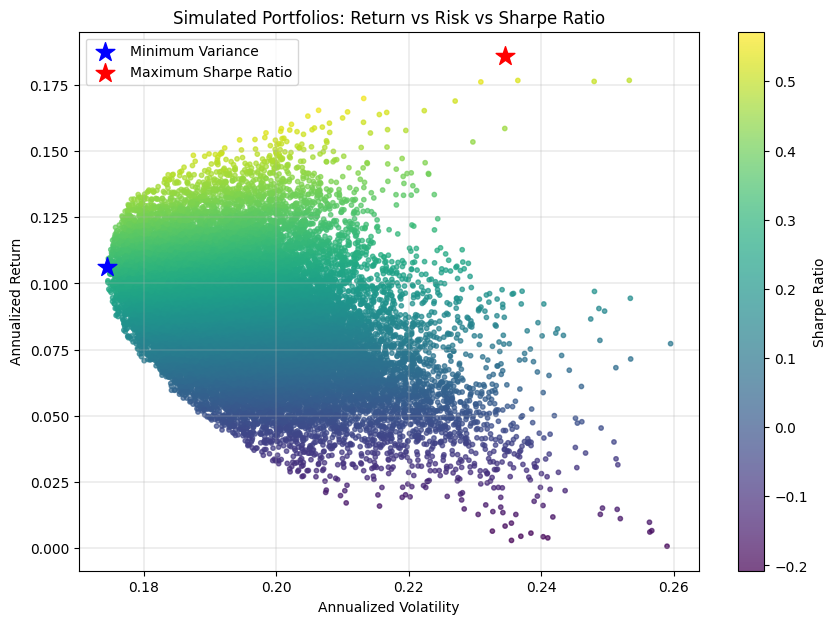

In [35]:
# Gráfica portafolios.
plt.figure(figsize=(10,7))
plt.scatter(results_portfolios["Std Dev"], results_portfolios["Rtrn"], c=results_portfolios["Sharpe Ratio"], alpha=0.7, s=10)
plt.colorbar().set_label("Sharpe Ratio")

plt.scatter(min_var_risk, min_var_rent, marker='*', s=200, color="blue", label="Minimum Variance")
plt.scatter(max_sr_risk, max_sr_rent, marker='*', s=200, color="red", label="Maximum Sharpe Ratio")

plt.title('Simulated Portfolios: Return vs Risk vs Sharpe Ratio')
plt.xlabel('Annualized Volatility')
plt.ylabel('Annualized Return')

plt.grid(True, linewidth=0.3)
plt.legend()
plt.show()

In [36]:
print("-"*80)

# Ponderaciones Portafolio de Mínima Varianza.
pond_min_vr = pd.DataFrame(weights.iloc[min_var_index], index=stocks)
pond_min_vr.columns = ["Allocation"]
pond_min_vr.Allocation = [round(i*100, 2) for i in pond_min_vr.Allocation]
print("Minimum Variance Portfolio")
print("\n")
print(f"Annualized Return: {round(min_var_rent*100, 2)}")
print(f"Annualized Risk: {round(min_var_risk*100, 2)}")
print(f"Sharpe Ratio: {round(min_var_sr, 2)}")
print("\n")
print(pond_min_vr.T)

print("-"*80)

# Ponderaciones Portafolio de Máxima Eficiencia.
pond_max_sr = pd.DataFrame(weights.iloc[max_sr_index], index=stocks)
pond_max_sr.columns = ["Allocation"]
pond_max_sr.Allocation = [round(i*100, 2) for i in pond_max_sr.Allocation]
print("Maximum Efficiency Portfolio")
print("\n")
print(f"Annualized Return: {round(max_sr_rent*100, 2)}")
print(f"Annualized Risk: {round(max_sr_risk*100, 2)}")
print(f"Sharpe Ratio: {round(max_sr_sr, 2)}")
print("\n")
print(pond_max_sr.T)
print("-"*80)

--------------------------------------------------------------------------------
Minimum Variance Portfolio


Annualized Return: 10.63
Annualized Risk: 17.44
Sharpe Ratio: 0.31


            AAPL    CVX  SBUX    UNH     V
Allocation  0.11  25.69  9.64  39.55  25.0
--------------------------------------------------------------------------------
Maximum Efficiency Portfolio


Annualized Return: 18.59
Annualized Risk: 23.45
Sharpe Ratio: 0.57


            AAPL    CVX  SBUX   UNH      V
Allocation  1.63  75.81  0.07  3.64  18.84
--------------------------------------------------------------------------------


In [37]:
# Minimización de Varianza.
def min_variance_f(varcov):
    number_assets = varcov.shape[0]
    initial_point = number_assets*[1/number_assets]

    args = (varcov)
    constraints = ({"type" : "eq", "fun" : lambda x: np.sum(x) - 1})
    bounds = tuple((0.0, 1.0) for asset in range(number_assets))

    result = scipy.optimize.minimize(risk_Portfolios_f, initial_point, args=args,
                                     method="SLSQP", bounds=bounds, constraints=constraints)
    
    return result.x

# Máximización de Sharpe Ratio.
def max_sharpe_ratio_f(mean_returns, varcov, risk_free):
    
    def auxiliar1(weights, mean_returns, varcov, risk_free):
        a = rent_Portfolios_f(weights=weights, mean_returns=mean_returns)
        b = risk_Portfolios_f(weights=weights, varcov=varcov)
        c = -((a - risk_free)/b)

        return c
    
    number_assets = len(mean_returns)
    initial_point = number_assets*[1/number_assets]

    args = (mean_returns, varcov, risk_free)
    constraints = ({"type" : "eq", "fun" : lambda x: np.sum(x) - 1})
    bounds = tuple((0.0, 1.0) for asset in range(number_assets))

    result = scipy.optimize.minimize(auxiliar1, initial_point, args=args,
                                     method="SLSQP", bounds=bounds, constraints=constraints)
    
    return result.x

# Calculo Frontera eficiente.
def efficient_frontier_f(mean_returns, varcov, target):
    number_assets = len(mean_returns)
    initial_point = number_assets*[1/number_assets]

    args = (varcov)
    constraints = ({"type" : "eq", "fun" : lambda x: rent_Portfolios_f(x, mean_returns) - target},
                   {"type" : "eq", "fun" : lambda x: np.sum(x) - 1})
    bounds = tuple((0.0, 1.0) for asset in range(number_assets))

    result = scipy.optimize.minimize(risk_Portfolios_f, initial_point, args=args,
                                     method="SLSQP", bounds=bounds, constraints=constraints)
    
    return result.x    


In [38]:
# Portafolio de Mínima Varianza (Optimización).
weights_min_var_clc = min_variance_f(cov_matrix)
min_var_rent_clc = rent_Portfolios_f(weights_min_var_clc, mean_returns)
min_var_risk_clc = risk_Portfolios_f(weights_min_var_clc, cov_matrix)
min_var_sr_clc = sharpe_ratio_f(min_var_rent_clc, risk_free, min_var_risk_clc)

# Portafolio de Máxima Eficiencia (Optimización).
weights_max_sr_clc = max_sharpe_ratio_f(mean_returns, cov_matrix, risk_free)
max_sr_rent_clc = rent_Portfolios_f(weights_max_sr_clc, mean_returns)
max_sr_risk_clc = risk_Portfolios_f(weights_max_sr_clc, cov_matrix)
max_sr_sr_clc = sharpe_ratio_f(max_sr_rent_clc, risk_free, max_sr_risk_clc)

# Frontera eficiente.
rent_targets = np.linspace(min_var_rent_clc, np.max(results_portfolios["Rtrn"]), 100)

frontier_rent_clc = []
frontier_risk_clc = []
for i in rent_targets:
    weights_clc = efficient_frontier_f(mean_returns, cov_matrix, i)
    frontier_rent_clc.append(rent_Portfolios_f(weights_clc, mean_returns))
    frontier_risk_clc.append(risk_Portfolios_f(weights_clc, cov_matrix))

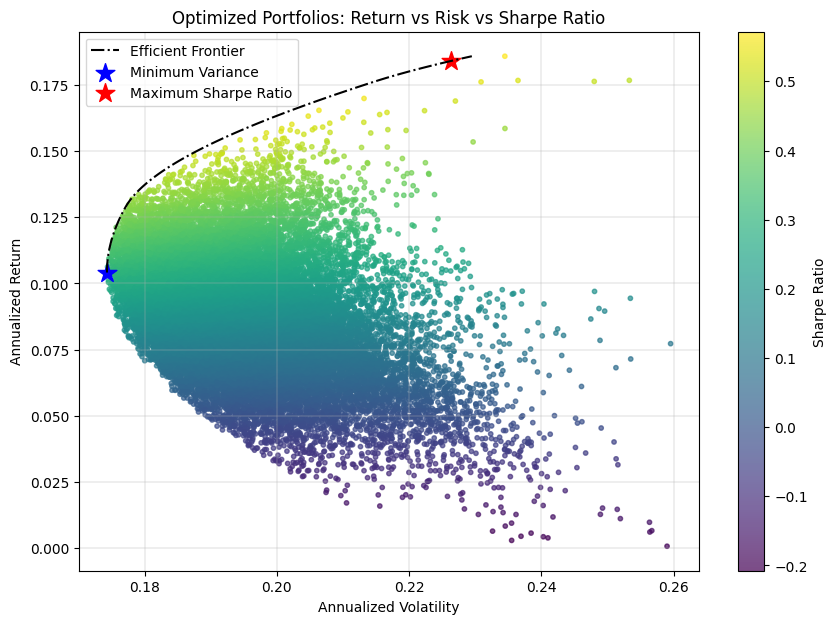

In [39]:
# Gráfica portafolios y frontera eficiente.
plt.figure(figsize=(10,7))
plt.scatter(results_portfolios["Std Dev"], results_portfolios["Rtrn"], c=results_portfolios["Sharpe Ratio"], alpha=0.7, s=10)
plt.colorbar().set_label("Sharpe Ratio")

plt.plot(frontier_risk_clc, frontier_rent_clc, linestyle = "-.", color = "black", label = "Efficient Frontier")

plt.scatter(min_var_risk_clc, min_var_rent_clc, marker='*', s=200, color="blue", label="Minimum Variance")
plt.scatter(max_sr_risk_clc, max_sr_rent_clc, marker='*', s=200, color="red", label="Maximum Sharpe Ratio")

plt.title('Optimized Portfolios: Return vs Risk vs Sharpe Ratio')
plt.xlabel('Annualized Volatility')
plt.ylabel('Annualized Return')

plt.grid(True, linewidth=0.3)
plt.legend()
plt.show()

In [46]:
print("-"*80)

# Ponderaciones Portafolio de Mínima Varianza.
pond_min_vr_clc = pd.DataFrame(weights_min_var_clc, index=stocks)
pond_min_vr_clc.columns = ["Allocation"]
pond_min_vr_clc.Allocation = [round(i*100, 2) for i in pond_min_vr_clc.Allocation]
print("Minimum Variance Portfolio")
print("\n")
print(f"Annualized Return: {round(min_var_rent_clc*100, 2)}")
print(f"Annualized Risk: {round(min_var_risk_clc*100, 2)}")
print(f"Sharpe Ratio: {round(min_var_sr_clc, 2)}")
print("\n")
print(pond_min_vr_clc.T)

print("-"*80)

# Ponderaciones Portafolio de Máxima Eficiencia.
pond_max_sr_clc = pd.DataFrame(weights_max_sr_clc, index=stocks)
pond_max_sr_clc.columns = ["Allocation"]
pond_max_sr_clc.Allocation = [round(i*100, 4) for i in pond_max_sr_clc.Allocation]
print("Maximum Efficiency Portfolio")
print("\n")
print(f"Annualized Return: {round(max_sr_rent_clc*100, 2)}")
print(f"Annualized Risk: {round(max_sr_risk_clc*100, 2)}")
print(f"Sharpe Ratio: {round(max_sr_sr_clc, 2)}")
print("\n")
print(pond_max_sr_clc.T)
print("-"*80)

--------------------------------------------------------------------------------
Minimum Variance Portfolio


Annualized Return: 10.41
Annualized Risk: 17.43
Sharpe Ratio: 0.3


            AAPL    CVX   SBUX    UNH      V
Allocation   0.0  24.12  10.29  39.38  26.21
--------------------------------------------------------------------------------
Maximum Efficiency Portfolio


Annualized Return: 18.41
Annualized Risk: 22.63
Sharpe Ratio: 0.58


            AAPL      CVX  SBUX  UNH        V
Allocation   0.0  69.7421   0.0  0.0  30.2579
--------------------------------------------------------------------------------


In [21]:
# Juan David Rincón, Mayo 2023.
# Última modificación, Enero 2024.